In [3]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
#Import csv file for hospital charges
df = pd.read_csv("Inpatient_Prospective_Payment_System.csv")
df.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments ', 'Average Medicare Payments'],
      dtype='object')

In [5]:
#Convert strings to numeric in dataframe and export cleaned csv
df[' Average Covered Charges '] = pd.to_numeric(df[' Average Covered Charges '].apply(lambda x: x.strip('$')))
df[' Average Total Payments '] = pd.to_numeric(df[' Average Total Payments '].apply(lambda x: x.strip('$')))
df['Average Medicare Payments'] = pd.to_numeric(df['Average Medicare Payments'].apply(lambda x: x.strip('$')))
#df.to_csv("hospital_charges_numeric.csv")
df.head(10)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44
5,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10023,BAPTIST MEDICAL CENTER SOUTH,2105 EAST SOUTH BOULEVARD,MONTGOMERY,AL,36116,AL - Montgomery,67,16920.79,6653.80,5374.14
6,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,51,11977.13,5834.74,4761.41
7,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,32,35841.09,8031.12,5858.50
8,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10039,HUNTSVILLE HOSPITAL,101 SIVLEY RD,HUNTSVILLE,AL,35801,AL - Huntsville,135,28523.39,6113.38,5228.40
9,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10040,GADSDEN REGIONAL MEDICAL CENTER,1007 GOODYEAR AVENUE,GADSDEN,AL,35903,AL - Birmingham,34,75233.38,5541.05,4386.94


In [6]:
#Filter for top 5 services
top_5 = df.loc[(df['DRG Definition'] == "194 - SIMPLE PNEUMONIA & PLEURISY W CC") |
               (df['DRG Definition'] == "690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC") |
               (df['DRG Definition'] == "292 - HEART FAILURE & SHOCK W CC") |
               (df['DRG Definition'] == "392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC") |
               (df['DRG Definition'] == "641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC"), :]
top_5.to_csv("top_5_services.csv")
top_5.head(2)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
25714,194 - SIMPLE PNEUMONIA & PLEURISY W CC,50242,DOMINICAN HOSPITAL,1555 SOQUEL DRIVE,SANTA CRUZ,CA,95065,CA - Santa Cruz,96,60386.84,9175.01,8250.46
25800,194 - SIMPLE PNEUMONIA & PLEURISY W CC,70027,MANCHESTER MEMORIAL HOSPITAL,71 HAYNES ST,MANCHESTER,CT,6040,CT - Hartford,69,16737.85,6583.78,5606.82


In [7]:
top_5_list = top_5['DRG Definition'].unique()
top_5_list

array(['194 - SIMPLE PNEUMONIA & PLEURISY W CC',
       '292 - HEART FAILURE & SHOCK W CC',
       '392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC',
       '641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC',
       '690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC'], dtype=object)

In [8]:
def make_histogram(service):
    service_df = df.loc[(df['DRG Definition'] == service)]
    maxs = service_df[' Average Covered Charges '].max()
    bins = np.arange(0,maxs, 2000)
    plt.figure(figsize=(20,10))
    print(plt.hist(service_df[' Average Covered Charges '], bins=bins))

In [9]:
def make_histogram_cost(service):
    service_df = df.loc[(df['DRG Definition'] == service)]
    maxs = service_df['Average Medicare Payments'].max()
    bins = np.arange(0,maxs, 2000)
    plt.figure(figsize=(20,10))
    print(plt.hist(service_df['Average Medicare Payments'], bins=bins))

In [10]:
grouped2 = df.groupby('DRG Definition').mean()
grouped2_sort = grouped2.sort_values(' Average Covered Charges ', ascending = False)
grouped2_sort.head()

,Provider Id,Provider Zip Code,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
DRG Definition,,,,,,
870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,248118.353568,47751.671991,24.093717,163227.331725,44259.485463,41899.432929
207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS,252371.368874,46165.925193,22.710232,143428.051066,38588.920997,36029.548469
853 - INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC,248903.949855,49303.256541,28.693314,139186.350937,40315.961432,37818.739942
329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC,253779.302168,48720.159892,25.237127,135330.939966,37765.594295,35458.254905
246 - PERC CARDIOVASC PROC W DRUG-ELUTING STENT W MCC OR 4+ VESSELS/STENTS,247694.097056,51787.689204,29.557252,96348.806707,23326.339019,21052.854929


(array([  0.00000000e+00,   2.00000000e+01,   2.05400000e+03,
         6.51000000e+02,   2.07000000e+02,   5.50000000e+01,
         2.90000000e+01,   5.00000000e+00,   1.00000000e+00,
         0.00000000e+00,   0.00000000e+00]), array([     0.,   2000.,   4000.,   6000.,   8000.,  10000.,  12000.,
        14000.,  16000.,  18000.,  20000.,  22000.]), <a list of 11 Patch objects>)
(array([    0.,     3.,  1850.,   759.,   237.,    61.,    31.,    11.]), array([     0.,   2000.,   4000.,   6000.,   8000.,  10000.,  12000.,
        14000.,  16000.]), <a list of 8 Patch objects>)
(array([    0.,  1996.,   762.,   147.,    41.]), array([     0.,   2000.,   4000.,   6000.,   8000.,  10000.]), <a list of 5 Patch objects>)
(array([  0.00000000e+00,   2.04800000e+03,   6.90000000e+02,
         1.23000000e+02,   3.60000000e+01,   1.00000000e+00,
         0.00000000e+00]), array([     0.,   2000.,   4000.,   6000.,   8000.,  10000.,  12000.,
        14000.]), <a list of 7 Patch objects>)
(array([

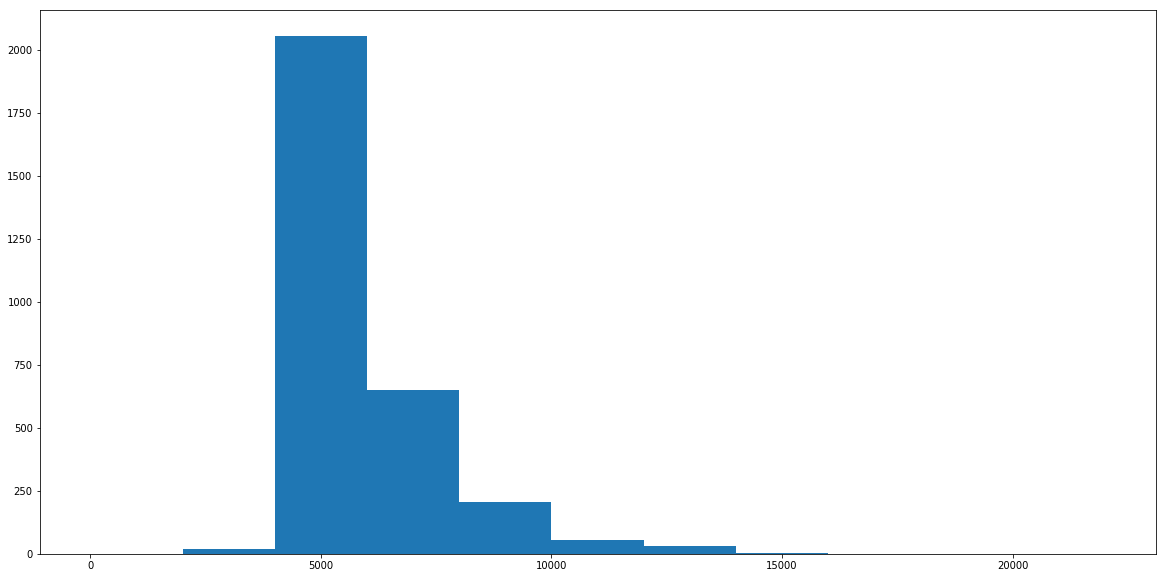

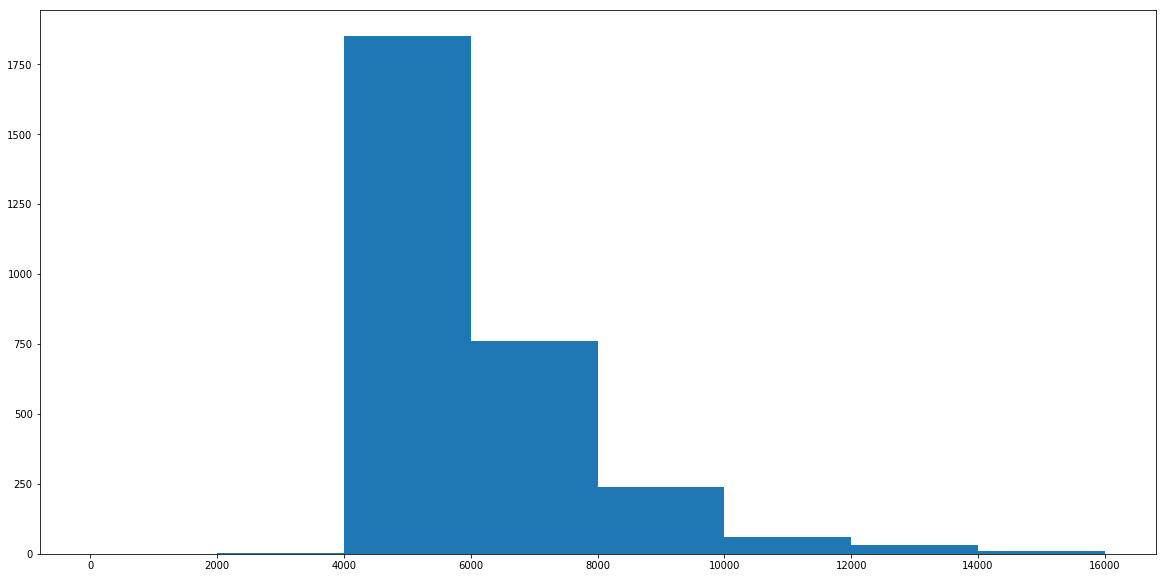

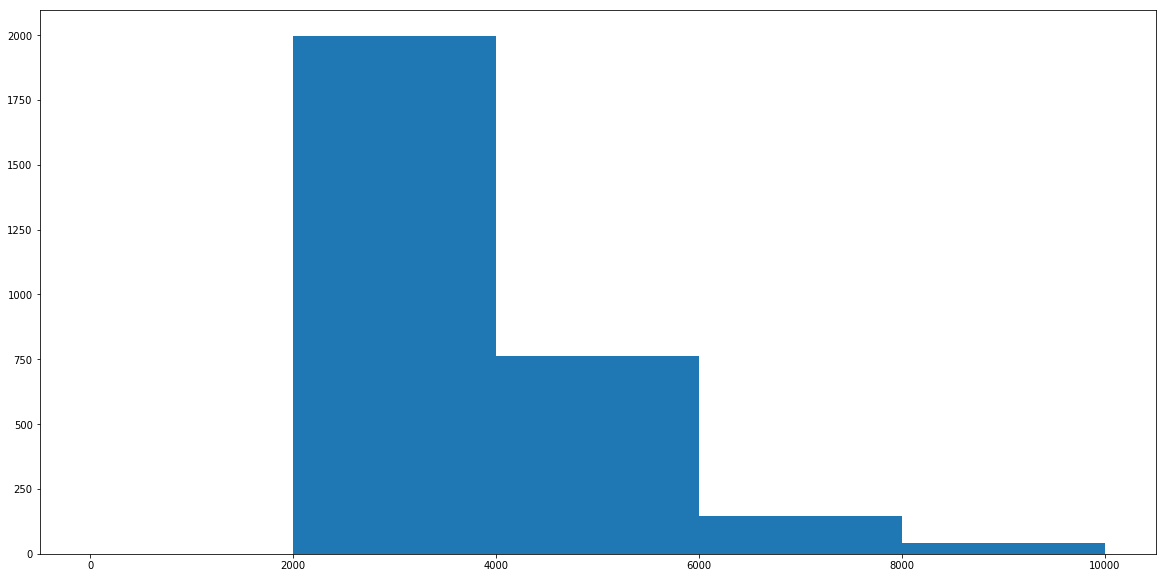

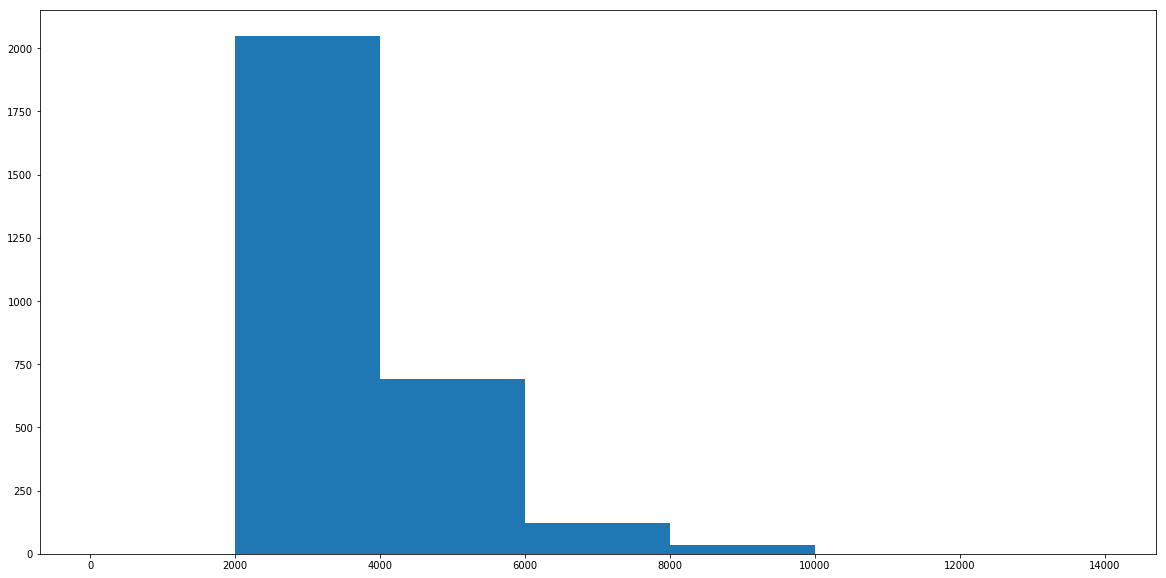

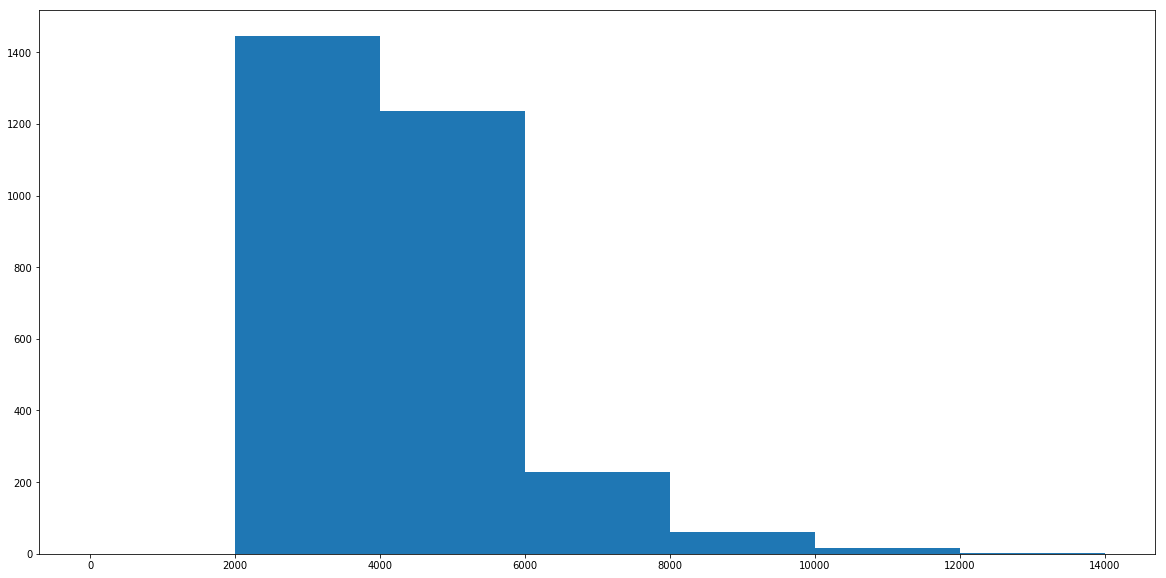

In [11]:
for service in top_5_list:
    make_histogram_cost(service)

(array([   0.,    0.,    7.,   30.,  128.,  184.,  268.,  289.,  296.,
        249.,  181.,  209.,  197.,  140.,  127.,  100.,   73.,   59.,
         56.,   58.,   35.,   40.,   41.,   38.,   33.,   18.,   18.,
         23.,   25.,   11.,   13.,   11.,   11.,    7.,    3.,    5.,
          3.,    5.,    4.,    5.,    3.,    0.,    1.,    3.,    3.,
          3.,    2.,    1.,    0.,    0.,    1.,    0.,    2.,    0.,
          1.,    1.,    0.,    0.,    0.,    0.,    0.,    1.]), array([      0.,    2000.,    4000.,    6000.,    8000.,   10000.,
         12000.,   14000.,   16000.,   18000.,   20000.,   22000.,
         24000.,   26000.,   28000.,   30000.,   32000.,   34000.,
         36000.,   38000.,   40000.,   42000.,   44000.,   46000.,
         48000.,   50000.,   52000.,   54000.,   56000.,   58000.,
         60000.,   62000.,   64000.,   66000.,   68000.,   70000.,
         72000.,   74000.,   76000.,   78000.,   80000.,   82000.,
         84000.,   86000.,   88000.,   90000.

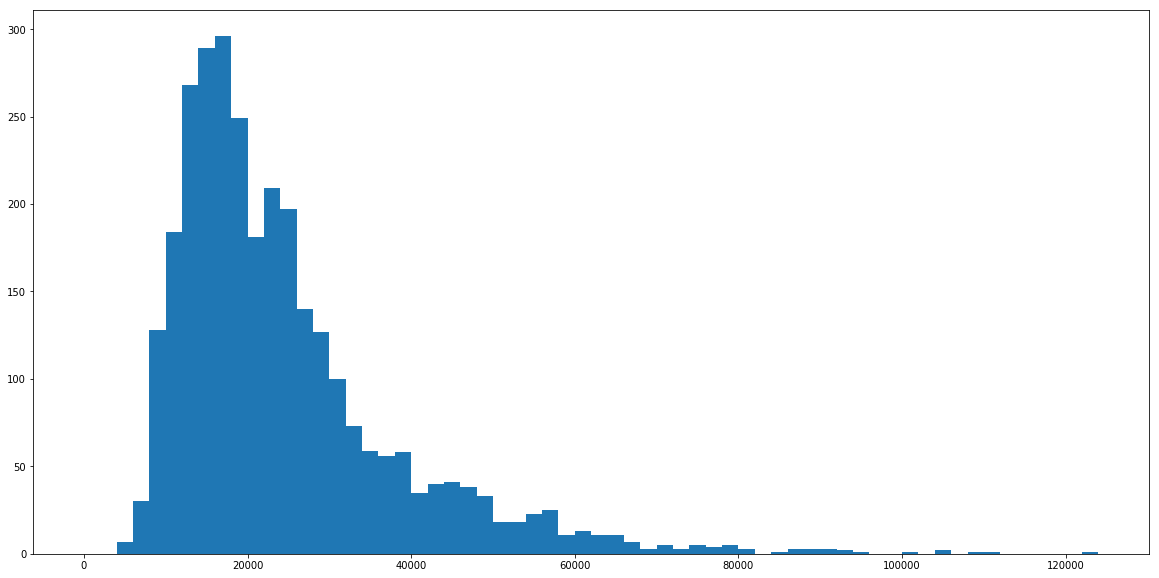

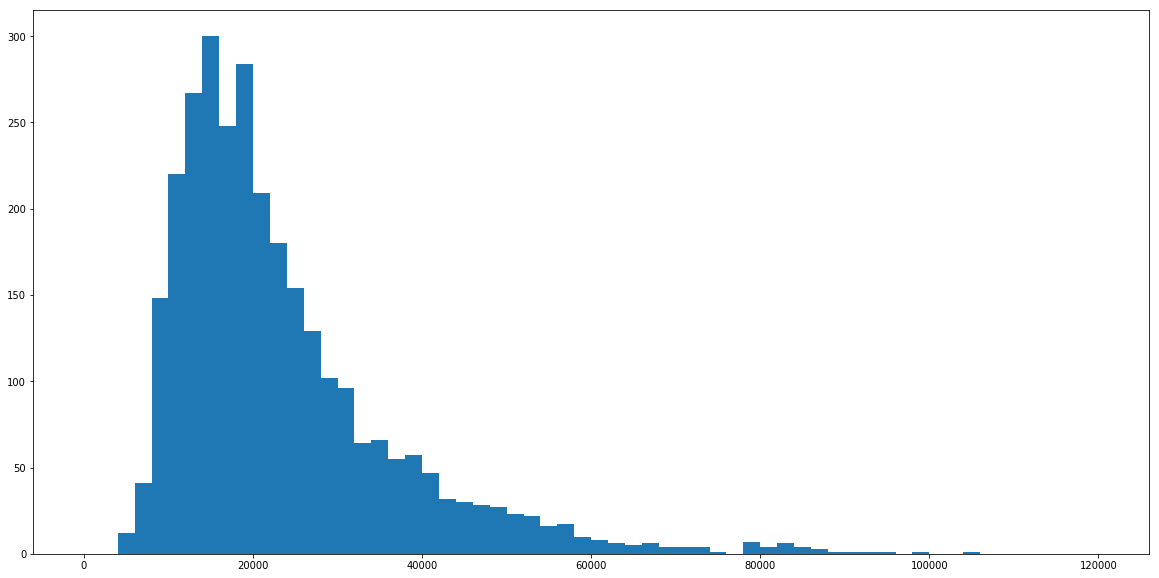

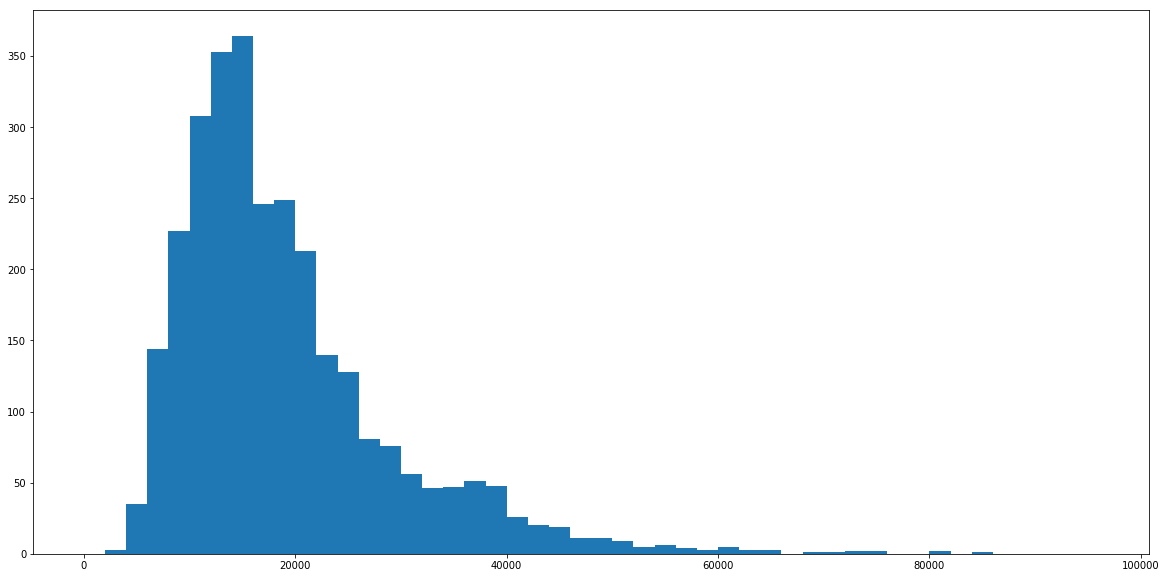

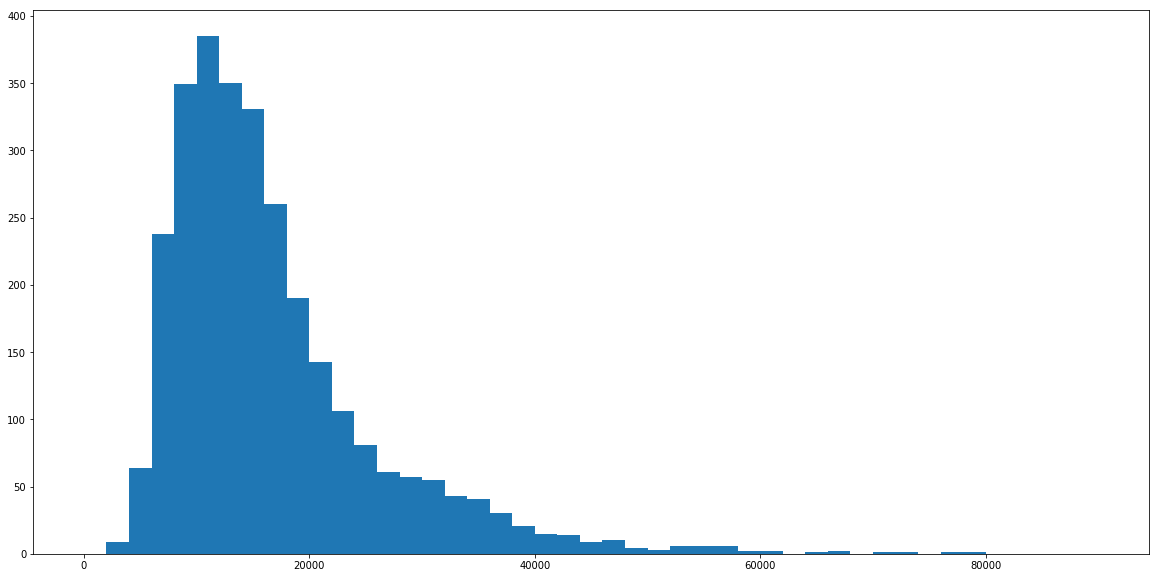

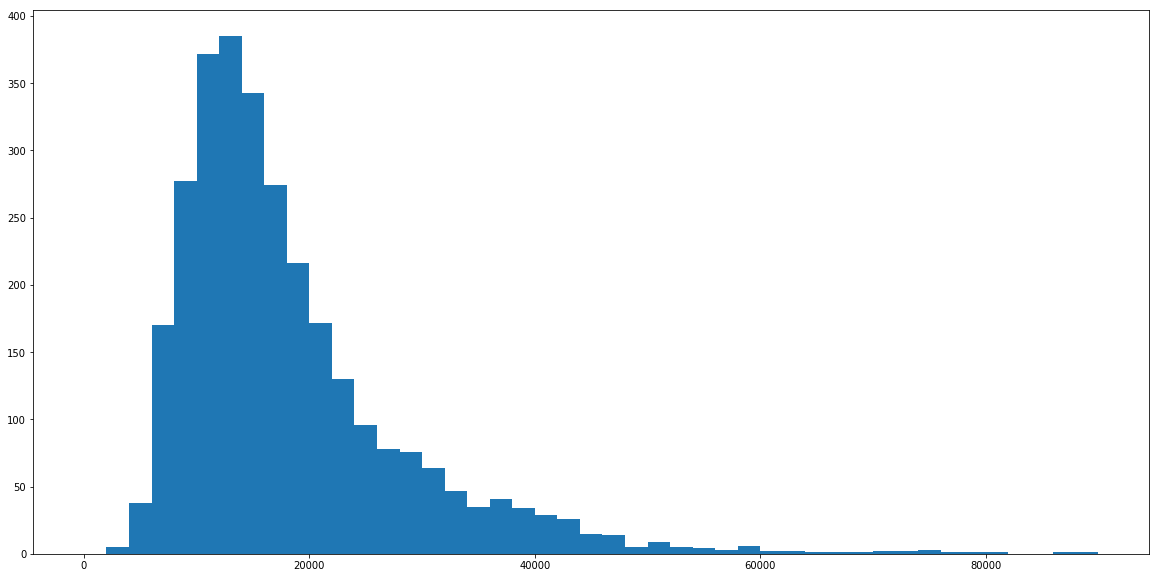

In [12]:
for service in top_5_list:
    make_histogram(service)

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   3.,   3.,
         2.,   7.,   2.,   6.,   7.,   5.,   7.,   4.,   7.,   9.,  11.,
         7.,   9.,   3.,   6.,   7.,   8.,  10.,   9.,   8.,   7.,   8.,
        11.,  12.,  12.,   7.,   9.,  13.,   9.,  11.,  15.,  13.,   6.,
        13.,  10.,  14.,  12.,  19.,  17.,  12.,  18.,   7.,  13.,  13.,
        14.,  12.,  12.,   8.,   2.,  13.,   8.,  10.,  12.,  14.,  12.,
        14.,   6.,   3.,  10.,  10.,   3.,   8.,   6.,  10.,  12.,   6.,
         7.,   7.,   1.,   8.,   8.,   6.,   7.,   3.,   5.,   4.,   7.,
         4.,   3.,   6.,   8.,   4.,   7.,   8.,   5.,   4.,   4.,   9.,
         3.,   2.,   3.,   8.,   3.,   5.,   2.,   4.,   3.,   2.,   5.,
         2.,   4.,   3.,   6.,   2.,   4.,   4.,   2.,   6.,   2.,   2.,
         2.,   2.,   2.,   2.,   5.,   3.,   3.,   2.,   3.,   7.,   2.,
         2.,   1.,   0.,   1.,   1.,   1.,   4.,  

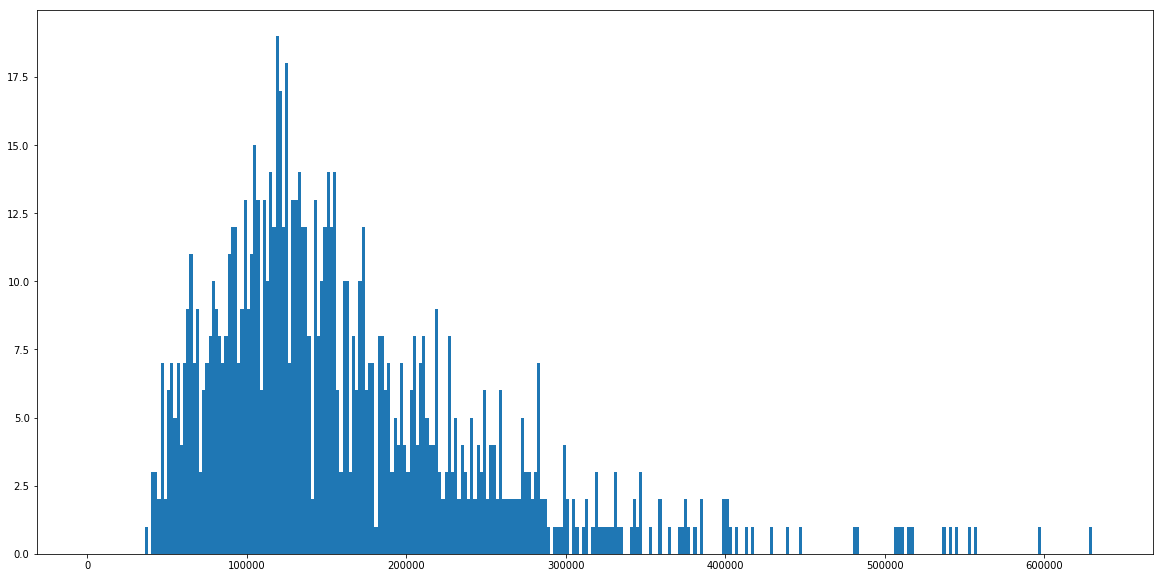

In [13]:
make_histogram('870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS')

In [14]:
grouped_5 = top_5.groupby("DRG Definition")
mean_5 = grouped_5.mean()
sem_5 = grouped_5.sem()
mean_5.head()

,Provider Id,Provider Zip Code,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
DRG Definition,,,,,,
194 - SIMPLE PNEUMONIA & PLEURISY W CC,259537.788621,50358.601389,65.626861,24549.381211,6963.253596,5890.898812
292 - HEART FAILURE & SHOCK W CC,258867.616661,50001.124958,75.190654,23517.980789,6957.831656,6132.341256
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",258448.829492,49973.425424,83.001356,19086.716512,5041.766136,3962.437668
"641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC",259015.955847,49832.188341,53.004484,16703.611059,4781.625178,3855.451093
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,259098.446972,50231.157912,69.151890,18280.231134,5353.763309,4437.804065


In [15]:
sem_5.head()

,Average Covered Charges,Average Total Payments,Total Discharges,Average Medicare Payments,Hospital Referral Region Description,Provider City,Provider Id,Provider Name,Provider State,Provider Street Address,Provider Zip Code
DRG Definition,,,,,,,,,,,
194 - SIMPLE PNEUMONIA & PLEURISY W CC,259.649362,29.978702,0.871856,29.579597,NaN,NaN,2828.377322,NaN,NaN,NaN,503.304218
292 - HEART FAILURE & SHOCK W CC,251.170742,30.373737,1.215734,30.098924,NaN,NaN,2861.170487,NaN,NaN,NaN,511.462385
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",191.751762,21.648651,1.409529,21.554777,NaN,NaN,2859.000839,NaN,NaN,NaN,509.897061
"641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC",176.779380,21.688191,0.754585,20.999926,NaN,NaN,2870.907697,NaN,NaN,NaN,511.503230
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,191.185724,23.507670,1.068838,23.416986,NaN,NaN,2857.759501,NaN,NaN,NaN,505.726215
